# Introducción a Jupyter Notebook, Pandas, Matplotlib, etc.

En esta hoja introduciremos la forma de trabajar con Jupyter Notebook, instalado a través de la imagen docker `jupyter/scipy-notebook`. Veremos cómo los distintos elementos de las librerías de Python interactúan con el notebook para mostrar imágenes, gráficos, etc. También, en las siguientes sesiones los usaremos para acceder a conexiones SQL y a bases de datos NoSQL.

Enlaces a otros tutoriales introductorios (que también se centran en tratamiento de datos para Big Data): [1](https://github.com/CharlestonDataScience/PythonNotebooks/blob/master/notebooks/tutorial_01/pandas_tutorial.ipynb) y [2](https://github.com/phelps-sg/python-bigdata/blob/master/src/main/ipynb/pandas.ipynb), entre otros muchos.

##  Pequeña introducción a Docker, Docker-Compose y Jupyter Notebook

_Docker_ es un gestor de contenedores. Permite instalar paquetes pre-instalados de las utilidades que vamos a usar en este curso. En las máquinas del laboratorio está instalado el paquete _Docker_ de Jupyter Notebook que usaremos. Para listar los contenedores _docker_ disponibles en una máquina podemos ejecutar `docker images`:

    $ docker images
    REPOSITORY                     TAG                 IMAGE ID            CREATED             SIZE
    jupyter/scipy-notebook         latest              fd9cad0aeeeb        2 months ago        6.57GB
    neo4j                          latest              9481a852963b        2 months ago        173MB
    mongo                          latest              57c67caab3d8        2 months ago        359MB

_Docker_ ofrece también `docker-compose`, una utilidad que permite conectar entre sí varios contenedores ofreciendo servicios. `docker-compose` también descargará automáticamente los contenedores necesarios. En cada directorio de cada sesión de prácticas existirá un fichero `docker-compose.yml`, que incluye la configuración para ejecutar el _Notebook_ y los otros contenedores necesarios (por ejemplo otras bases de datos).

Para las prácticas vamos a usar la imagen `jupyter/scipy-notebook`. La información de cómo usar este contenedor se puede obtener [aquí](https://hub.docker.com/r/jupyter/scipy-notebook/).

### Instalación de Docker en Windows

Si se quiere utilizar Docker desde Windows, se puede hacer igualmente. Existen unas instrucciones para usar [Docker en Windows](https://docs.docker.com/docker-for-windows/). Una vez instalado, habría que instalar la imagen que usaremos con la misma orden `docker pull jupyter/scipy-notebook`.


### Descarga del código de prácticas

Existen varias formas de traer el código de prácticas al contenedor. La más sencilla es ejecutar el siguiente código:
    
    $ git clone https://github.com/dsevilla/bdge.git
    
Esto creará el directorio `bdge` con todo el código de las prácticas. Dentro de cada subdirectorio (por ejemplo en este caso `intro`), habrá un fichero `docker-compose.yml`, que sirve para ejecutar y conectar los contenedores necesarios para cada parte de la práctica. Así pues:

    $ git clone https://github.com/dsevilla/bdge.git
    $ cd bdge/intro
    $ docker-compose up
    Creating network "intro_default" with the default driver
    Creating intro_notebook_1 ... done
    Attaching to intro_notebook_1
    notebook_1  | Execute the command
    notebook_1  | [I 10:32:05.350 NotebookApp] Writing notebook server cookie secret to ...
    notebook_1  | [I 10:32:05.578 NotebookApp] Serving notebooks from local directory: /home/jovyan
    notebook_1  | [I 10:32:05.578 NotebookApp] 0 active kernels 
    notebook_1  | [I 10:32:05.578 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
    notebook_1  |     to login:
    notebook_1  |         http://localhost:8888/

Accediendo a la IP http://localhost:8888/ ó http://127.0.0.1:8888/ se accede al _Notebook_, y el directorio actual (`intro`) aparece disponible en la lista de directorios.

**Se aconseja guardar el Notebook con otro nombre (File->Rename...) para evitar problemas con las actualizaciones posteriores del repositorio con `git`.**

Para parar el contenedor, se puede ejecutar:

    $ docker-compose stop
    $ docker-compose rm

(Si no se realiza el `rm`, `docker-compose up` volverá a lanzar el contenedor anteriormente parado).

### Ejecución del Jupyter Notebook de forma aislada

El Notebook también se puede ejecutar independientemente. Para ejecutar una sesión de Jupyter Notebook hay que escribir:

    $ docker run -it --rm -p 8888:8888 jupyter/scipy-notebook
    [I 23:39:02.615 NotebookApp] Writing notebook server cookie secret to ...
    [W 23:39:02.712 NotebookApp] WARNING: The notebook server is listening ...
    [I 23:39:02.877 NotebookApp] Use Control-C to stop this server and shut down all kernels ...
    
    Copy/paste this URL into your browser when you connect for the first time,
    to login with a token:
        http://localhost:8888/?token=<TOKEN>


## Jupyter Notebook

Los *Notebooks* contienen una mezcla de texto y código, y se pueden ir ejecutando paso a paso. Al pulsar Ctrl+Intro en una celda, se ejecuta el código de la celda y se muestra el la siguiente celda. Al pulsar Shift+Intro se ejecuta la celda actual y pasa automáticamente a la siguiente.

Existen también "magics", que sirven para obtener información de la hoja, o ejecutar comandos especiales. Por ejemplo, órdenes de shell, como en la siguiente celda. Hay varios tutoriales Online. Por ejemplo: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/ipython.ipynb).

In [1]:
!uname -a

Linux 0b561bd0bb1b 4.9.93-linuxkit-aufs #1 SMP Wed Jun 6 16:55:56 UTC 2018 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

A continuación mostramos los paquetes que usaremos regularmente para tratar datos, `pandas`, `numpy`, `matplotlib`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Lo siguiente hace que los gráficos se muestren inline. Para figuras pequeñas se puede utilizar unas figuras interactivas que permiten zoom, usando `%maplotlib nbagg`.

In [4]:
%matplotlib inline
matplotlib.style.use('ggplot')

## Numpy

Numpy es una de las librerías más utilizadas en Python, y ofrece un interfaz sencillo para operaciones eficientes con números, _arrays_ y matrices. Numpy se utilizará de apoyo muchas veces que haya que hacer procesamiento local de datos recogidos de una base de datos, o como preparación para la graficación de datos. En la celda siguiente se muestra un vídeo introductorio, y también se puede acceder a tutoriales online: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/operations.ipynb).

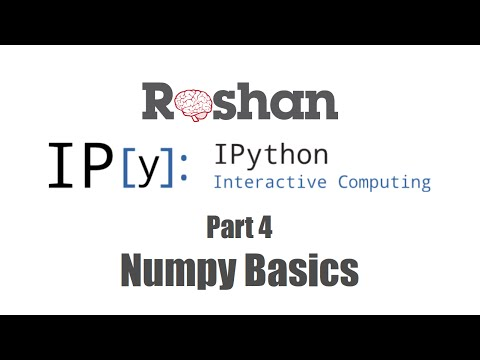

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('o8fmjaW9a0A') # Yes, it can also embed youtube videos.

Numpy permite generar y procesar arrays de datos de forma muy eficiente. A continuación se muestran algunos ejemplos:

In [8]:
a = np.array([3,4,5,6])
print(a.shape)
print(a[0])
a[0] = 9
print (a)

(4,)
3
[9 4 5 6]


In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1,20)

También arrays multidimensionales:

In [20]:
a = np.zeros((2,2))
print (a)

[[ 0.  0.]
 [ 0.  0.]]


In [21]:
a.ndim

2

In [22]:
a.dtype

dtype('float64')

In [24]:
b = np.random.random((2,2))
print (b)

[[ 0.06892649  0.0989806 ]
 [ 0.38759419  0.74339814]]


In [25]:
a = np.random.random((2,2))
print(a)

[[ 0.16544045  0.28606079]
 [ 0.31402308  0.88968373]]


In [26]:
print (a >= .5)

[[False False]
 [False  True]]


In [27]:
print (a[a >= .5])

[ 0.88968373]


¿Por qué usar Numpy? `%%capture` captura la salida de la ejecución de la celda en la variable dada como parámetro. Después se puede imprimir. `%timeit` se utiliza para ejecutar varias veces una instrucción y calcular un promedio de su duración.

In [28]:
%%capture timeit_output

%timeit l1 = range(1,1000)

%timeit l2 = np.arange(1,1000)

In [29]:
print(timeit_output)

244 ns +- 2.08 ns per loop (mean +- std. dev. of 7 runs, 1000000 loops each)
1.53 us +- 20.2 ns per loop (mean +- std. dev. of 7 runs, 1000000 loops each)



In [ ]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

In [ ]:
x * 2

In [ ]:
x ** 2

## Matplotlib

Matplotlib permite generar gráficos de forma sencilla. Lo veremos aquí primero conectado sólo con `Numpy` y después conectado con `Pandas`.

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
plt.subplot()
# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

In [ ]:
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y')
plt.plot(range(100))
plt.show()

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Pandas

Tutoriales: [1](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html), [2](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html), [3](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/)

Pandas permite gestionar conjuntos de datos n-dimensionales de diferentes formas, y también conectarlo con matplotlib para hacer gráficas.

Los conceptos principales de Pandas son los `Dataframe`s y las `Series`. La diferencia entre ambas es que la serie guarda sólo una serie (una columna o una fila, depende de como se quiera interpretar), mientras que un Dataframe guarda estructuras multidimensaionales agregando series.

Ambas tienen una "columna fantasma", que sirve de índice, y que se puede acceder con `d.index` (tanto si `d` es una serie o un dataframe). Si no se especifica un índice, se le añade uno virtual numerando las filas desde cero. Además, los índices pueden ser multidimensionales (por ejemplo, tener un índice por mes y dentro uno por dia de la semana).

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

In [ ]:
ts.describe()

In [ ]:
ts = ts.cumsum()
ts.plot();

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot();

Se puede hacer plot también de una columna contra otra.

In [ ]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.plot(x='A', y='B');

Valores incompletos. Si no se establecen, se pone a `NaN` (_not a number_). 

In [ ]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

`fillna()` permite cambiar el valor de los datos faltantes.

In [ ]:
df.fillna(0)

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'])

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

El primer ejemplo completo carga desde el fichero `swift-question-dates.txt.gz` las fechas de las preguntas en Stackoverflow que contienen el tag "swift".

In [ ]:
!zcat swift-question-dates.txt.gz | head

La función `read_csv` es capaz de leer cualquier fichero CSV y lo convierte en un "Dataframe", una estructura de tabla que guarda también los nombres y los tipos de las columnas, así como un índice por el que se identificarán las tablas. En este caso no se especifica ninguna columna como índice, por lo que se crea un índice automático numerado empezando desde 0. Se puede ver en la siguiente celda.

In [ ]:
df = pd.read_csv('swift-question-dates.txt.gz',header=None,names=['date'],compression='gzip',parse_dates=['date'],index_col='date')

In [ ]:
df

De la fecha, extraer sólo la fecha (no la hora, que no nos interesa).

In [ ]:
df.index = df.index.date

Añadimos una columna de todo "1" para especificar que cada pregunta cuenta como 1.

In [ ]:
df['Count'] = 1
df

A los Dataframe de Pandas también se les puede aplicar operaciones de agregación, como `groupby` o `sum`. Finalmente, la funcion `plot()` permite mostrar los datos en un gráfico.

In [ ]:
accum = df.groupby(df.index).sum()
accum

In [ ]:
# Los 30 primeros registros que tengan un número de preguntas mayor que 20 por día.
accum = accum[accum.Count > 20][:30]
accum

In [ ]:
accum[accum.Count > 30][:30].plot.bar()

In [ ]:
!pip install lxml

In [ ]:
dfwiki = pd.read_html('https://en.wikipedia.org/wiki/Swift_(programming_language)',attrs={'class': 'infobox vevent'})

In [ ]:
dfwiki[0]

In [ ]:
firstdate = dfwiki[0][1][4]
firstdate

In [ ]:
from dateutil.parser import parse
dt = parse(firstdate.split(';')[0])
assert dt.date().isoformat() == accum.index[0].isoformat()

In [ ]:
# cargar municipios y mostrarlos en el mapa
df = pd.read_csv('municipios-españa-2017.csv.gz',header=0,compression='gzip')

In [ ]:
df.head()

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[0].NOMBRE_ACTUAL

In [ ]:
df.loc[:,'NOMBRE_ACTUAL']

In [ ]:
df.iloc[:,0]

In [ ]:
df.PROVINCIA

In [ ]:
df[df.PROVINCIA == 'A Coruña']

In [ ]:
mula = df[df.NOMBRE_ACTUAL == 'Mula'].iloc[0]
mula

In [ ]:
(mula_lat,mula_lon) = (mula.LATITUD_ETRS89, mula.LONGITUD_ETRS89)
(mula_lat,mula_lon)

El paquete `folium` permite generar mapas de posiciones. El siguiente ejemplo centra un mapa en Madrid y pone un marcador con su nombre:

In [ ]:
!pip install folium

In [ ]:
import folium

map = folium.Map(location=[mula_lat, mula_lon],zoom_start=10)
folium.Marker(location = [mula_lat, mula_lon], popup=mula.NOMBRE_ACTUAL).add_to(map)

map

## Ejercicio

Mostrar con `folium` marcadores para cada pueblo de A Coruña y Murcia. Se pueden usar las funciones `itertuples()` o `iterrows()` de un `Dataframe` para recorrer los elementos del mismo.